In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from random import gauss
from random import uniform
import matplotlib.pyplot as plt
import math
import numpy 
from SALib.sample import saltelli 
from SALib.analyze import sobol
import pandas as pd
import plotly.graph_objs as go
import seaborn as sns

Reference Scenario

/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



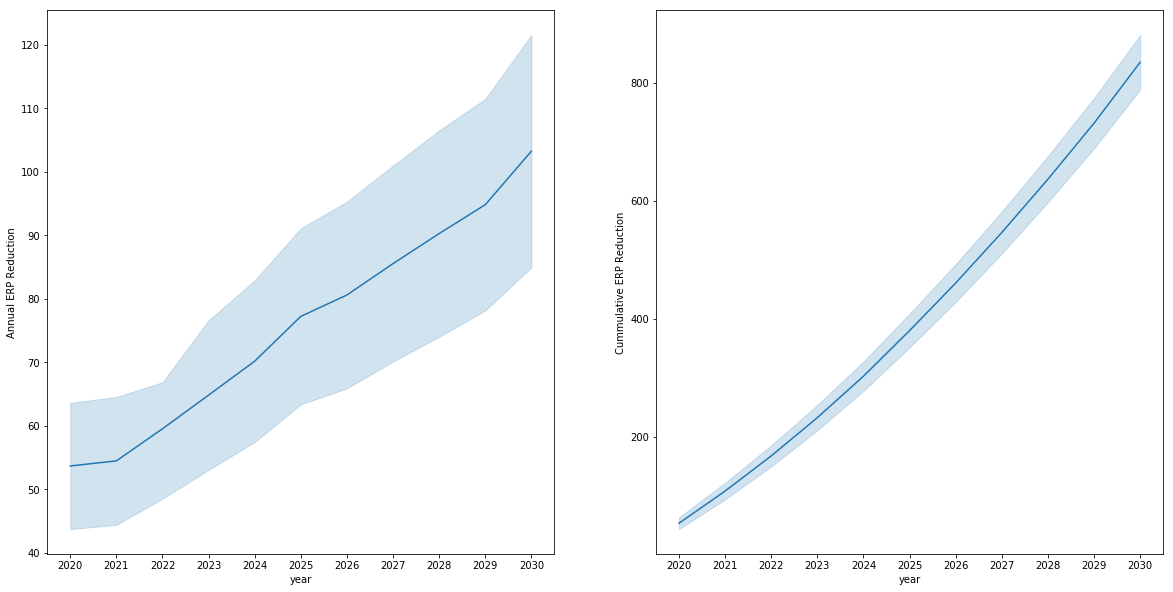

In [15]:
years = [2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]
TAM_size = [27775, 28488, 29160, 29836, 30515, 31064, 31880, 32565, 33251, 33938, 34733]
Target_Market_size_ref = [321, 330, 366, 403, 441, 490, 521,562, 604,647,716]
Total_DIRECT_GHG_footprint_of_TAM_ref = [13844, 13991, 14107, 14215, 14315, 14344,14455,14493,14521,14537,14587]

#The class is built on values fed in from Crane Database
example = Report(years, TAM_size, Target_Market_size_ref, Total_DIRECT_GHG_footprint_of_TAM_ref)

#We can then tune values when we call the function
example.generate_report(Financial_FOM_mean = -.30,
                         Financial_FOM_std = .05,
                         Physical_FOM_mean = .50,
                         Physical_FOM_std = .05,
                         Market_Share_of_Solution = 1.0,
                         samples = 10000,
                         distribution = 'normal')

/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



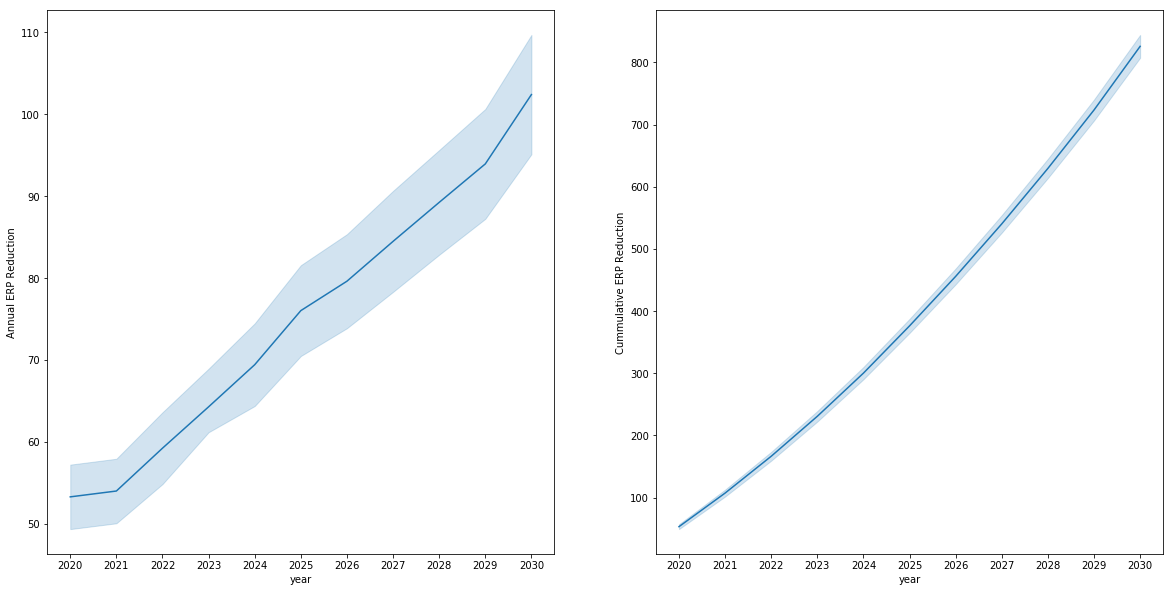

In [16]:
#The class is built on values fed in from Crane Database
example = Report(years, TAM_size, Target_Market_size_ref, Total_DIRECT_GHG_footprint_of_TAM_ref)

#We can then tune values when we call the function
example.generate_report(Financial_FOM_mean = -.30,
                         Financial_FOM_std = .02,
                         Physical_FOM_mean = .50,
                         Physical_FOM_std = .02,
                         Market_Share_of_Solution = 1.0,
                         samples = 10000,
                         distribution = 'normal')

/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



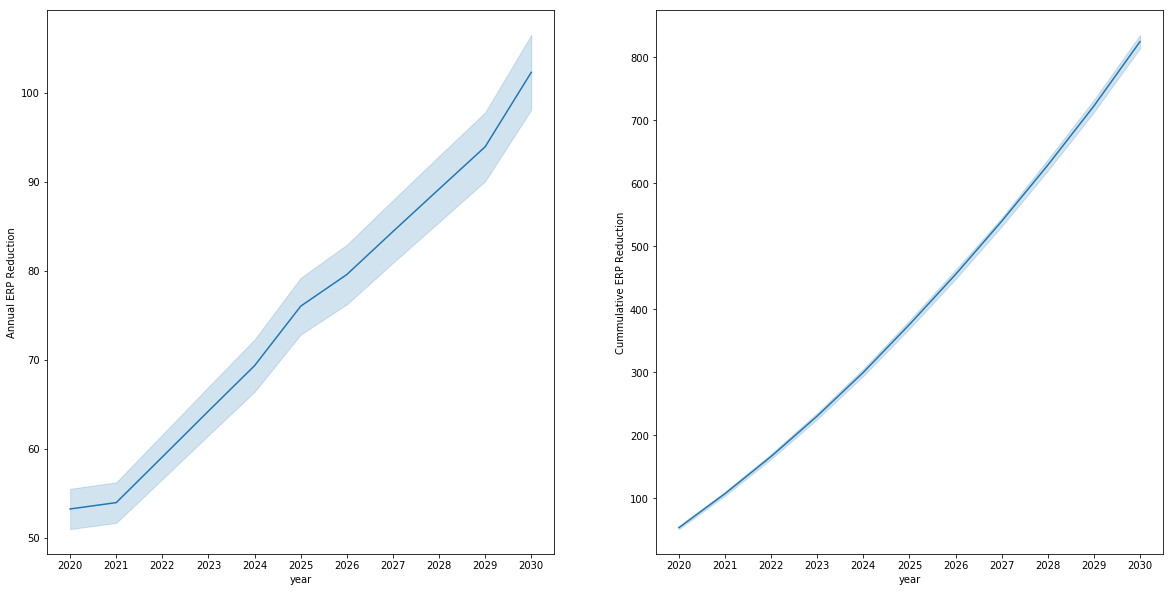

In [24]:
#The class is built on values fed in from Crane Database
example = Report(years, TAM_size, Target_Market_size_ref, Total_DIRECT_GHG_footprint_of_TAM_ref)

#We can then tune values when we call the function
example.generate_report(Financial_FOM_mean = -.30,
                         Financial_FOM_std = .02,
                         Physical_FOM_mean = .50,
                         Physical_FOM_std = .02,
                         Market_Share_of_Solution = 1.0,
                         samples = 10000,
                         distribution = 'fixed_physical_uni')

In [17]:
class Report:
    def __init__(self, 
                 years, 
                 arr_TAM_size, 
                 arr_Target_Market_size_ref, 
                 arr_Total_DIRECT_GHG_footprint_of_TAM_ref):
        """
        Dynamic researcher values, change over time
        """
        self.arr_TAM_size = arr_TAM_size
        self.arr_Target_Market_size_ref = arr_Target_Market_size_ref
        self.arr_Total_DIRECT_GHG_footprint_of_TAM_ref = arr_Total_DIRECT_GHG_footprint_of_TAM_ref
        
        #assert inputs are of the same length
        assert (len(years) == len(arr_Target_Market_size_ref) &
                len(years) == len(arr_Total_DIRECT_GHG_footprint_of_TAM_ref) &
                len(years) == len(arr_TAM_size))
        
        self.years = years
        
        """
        Constant researcher values, consistent throughout time
        """
        self.INDIRECT_GHG_intensity_of_Target_Market_ref = 0.091558#numerator is MtCO2e; denominator varies by technology
        self.Total_DIRECT_GHG_footprint_of_Target_Market_ref = 0.0  # MtCO2e
        
        self.Elasticity_of_demand_for_Tarket_Market = -.75#unitless
        self.INDIRECT_GHG_intensity_of_Solution = 0.061039#numerator is MtCO2e; denominator varies by technology
        self.DIRECT_GHG_intensity_of_Solution = 0#numerator is MtCO2e; denominator varies by technology
        
        """
        output variables
        """
        self.erp_std = ""
        self.erp_mean = ""
        
    def create_datapoint(self,
                         TAM_size, 
                         Target_Market_size_ref, 
                         Total_DIRECT_GHG_footprint_of_TAM_ref, 
                         Financial_FOM_mean,
                         Financial_FOM_std,
                         Physical_FOM_mean,
                         Physical_FOM_std):
        
            samples = self.samples
            distribution = self.distribution
            
            #Setting Constants
            igiotmf = self.INDIRECT_GHG_intensity_of_Target_Market_ref
            tdgfotmf = self.Total_DIRECT_GHG_footprint_of_Target_Market_ref
            msos = self.Market_Share_of_Solution

            Elasticity_of_demand_for_Tarket_Market = self.Elasticity_of_demand_for_Tarket_Market#unitless
            INDIRECT_GHG_intensity_of_Solution  = self.INDIRECT_GHG_intensity_of_Solution #numerator is MtCO2e; denominator varies by technology
            DIRECT_GHG_intensity_of_Solution  = self.DIRECT_GHG_intensity_of_Solution #numerator is MtCO2e; denominator varies by technology

            Market_Share_of_Solution = self.Market_Share_of_Solution



            #Ref Scenario Calculations
            Remaining_Market_size_ref = TAM_size - Target_Market_size_ref #
            DIRECT_GHG_Intensity_of_TAM_ref = tdgfotmf/TAM_size# numerator is MtCO2e; denominator varies by technology
            DIRECT_GHG_Intensity_of_Remaining_Market = (Total_DIRECT_GHG_footprint_of_TAM_ref - tdgfotmf)/Remaining_Market_size_ref# numerator is MtCO2e; denominator varies by technology
            DIRECT_GHG_intensity_of_Target_Market_ref = tdgfotmf/Target_Market_size_ref# numerator is MtCO2e; denominator varies by technology

            Total_INDIRECT_GHG_footprint_of_Target_Market_ref = Target_Market_size_ref * igiotmf# MtCO2e
            Total_DIRECT_GHG_footprint_of_Remaining_Market_ref = Remaining_Market_size_ref * DIRECT_GHG_Intensity_of_Remaining_Market# MtCO2e
            Total_GHG_footprint_of_TAM_ref = Total_INDIRECT_GHG_footprint_of_Target_Market_ref + tdgfotmf + Total_DIRECT_GHG_footprint_of_Remaining_Market_ref#MtCO2e
            ###this is the value to compare

            erp_tmp = []

            for i in range(samples):

               # User input values in solution description

                if distribution == 'uniform':
                    Relative_Financial_FOM = uniform(Financial_FOM_mean - Financial_FOM_std, Financial_FOM_mean + Financial_FOM_std) #%change
                    Relative_Physical_FOM = uniform(Physical_FOM_mean - Physical_FOM_std, Physical_FOM_mean + Physical_FOM_std) #%change
                elif distribution == 'normal':
                    Relative_Financial_FOM = gauss(Financial_FOM_mean, Financial_FOM_std) #%change
                    Relative_Physical_FOM = gauss(Physical_FOM_mean, Physical_FOM_std) #%change
                elif distribution == 'fixed_financial_uni':
                    Relative_Financial_FOM = Financial_FOM_mean #%change
                    Relative_Physical_FOM = uniform(Physical_FOM_mean - Physical_FOM_std, Physical_FOM_mean + Physical_FOM_std) #%change
                elif distribution == 'fixed_physical_uni':
                    Relative_Financial_FOM = uniform(Financial_FOM_mean - Financial_FOM_std, Financial_FOM_mean + Financial_FOM_std) #%change
                    Relative_Physical_FOM = Physical_FOM_mean
                else:
                    print("not a real distribution")
                    break


                #Solution Deployed Calculations

                Target_Market_size_sol = Target_Market_size_ref * (2/(1 - (Elasticity_of_demand_for_Tarket_Market * Market_Share_of_Solution*Relative_Financial_FOM /(2 + Market_Share_of_Solution*Relative_Financial_FOM))) - 1)# in Solution Scenario(s)
                Remaining_Market_size_sol = TAM_size - Target_Market_size_sol# in Solution Scenario(s)
                DIRECT_GHG_intensity_of_Target_Market_sol = DIRECT_GHG_intensity_of_Target_Market_ref*(1-Market_Share_of_Solution) + DIRECT_GHG_intensity_of_Solution * Market_Share_of_Solution# in Solution Scenario(s)
                Total_DIRECT_GHG_footprint_of_TAM_sol = Target_Market_size_sol * DIRECT_GHG_intensity_of_Target_Market_sol + Remaining_Market_size_sol * DIRECT_GHG_Intensity_of_Remaining_Market# in Solution Scenario(s)
                INDIRECT_GHG_intensity_of_Target_Marke_sol = igiotmf * (1 - Market_Share_of_Solution) + INDIRECT_GHG_intensity_of_Solution * Market_Share_of_Solution#  in Solution Scenario(s)
                Total_INDIRECT_GHG_footprint_of_Target_Market_sol = Target_Market_size_sol * INDIRECT_GHG_intensity_of_Target_Marke_sol# in Solution Scenario(s)
                Total_DIRECT_GHG_footprint_of_Target_Market_sol = Target_Market_size_sol * DIRECT_GHG_intensity_of_Target_Market_sol# in Solution Scenario(s)
                Total_DIRECT_GHG_footprint_of_Remaining_Market_sol = Remaining_Market_size_sol * DIRECT_GHG_Intensity_of_Remaining_Market# in Solution Scenario(s)

                Total_GHG_footprint_of_TAM_sol = Total_INDIRECT_GHG_footprint_of_Target_Market_sol + Total_DIRECT_GHG_footprint_of_Target_Market_sol + Total_DIRECT_GHG_footprint_of_Remaining_Market_sol# in Solution Scenario(s)
                ###this is the value to explore


                Emissions_Reduction_Potentional_annually = Total_GHG_footprint_of_TAM_ref  - Total_GHG_footprint_of_TAM_sol

                erp_tmp.append(Emissions_Reduction_Potentional_annually)

            erp_data = np.array(erp_tmp)
            # return mean and stdv
            return np.mean(erp_data), np.std(erp_data), Relative_Financial_FOM, Relative_Physical_FOM
#         except:
#             print("Something went wrong creating the datapoint")

    def generate_report(self, 
                        Financial_FOM_mean, 
                        Financial_FOM_std, 
                        Physical_FOM_mean,
                        Physical_FOM_std,
                        Market_Share_of_Solution,
                        samples = 10000,
                        distribution = 'normal'):

        self.samples = samples
        self.Market_Share_of_Solution = Market_Share_of_Solution
        self.distribution = distribution

        
        #initializing some arrays
        annual_df = pd.DataFrame()
        cum_df = pd.DataFrame()
        arr_std = np.array([])
        arr_mean = np.array([])
        
        #loading the arrays from Crane database
        arr_TAM_size= self.arr_TAM_size 
        arr_Target_Market_size_ref = self.arr_Target_Market_size_ref 
        arr_Total_DIRECT_GHG_footprint_of_TAM_ref = self.arr_Total_DIRECT_GHG_footprint_of_TAM_ref 
        
        
        #unit test for numbers
        for input_index, year in enumerate(self.years):
            # generate data point for the year
            mean, std, phys_fom, fin_fom= self.create_datapoint(
                         TAM_size = arr_TAM_size[input_index], 
                         Target_Market_size_ref = arr_Target_Market_size_ref[input_index], 
                         Total_DIRECT_GHG_footprint_of_TAM_ref = arr_Total_DIRECT_GHG_footprint_of_TAM_ref[input_index], 
                         Financial_FOM_mean = Financial_FOM_mean,
                         Financial_FOM_std = Financial_FOM_std,
                         Physical_FOM_mean = Physical_FOM_mean,
                         Physical_FOM_std = Physical_FOM_std)
            
            
            #append values to annual erp
            annual_df = annual_df.append({"Annual ERP Reduction": mean - std, "year": year}, ignore_index=True )
            annual_df = annual_df.append({"Annual ERP Reduction": mean, "year": year}, ignore_index=True )
            annual_df = annual_df.append({"Annual ERP Reduction": mean + std, "year": year}, ignore_index=True )

            
            #need to calculate root mean square of all tolerance
            arr_std = np.append(arr_std, std)
            cum_std = np.sqrt(np.sum(np.square(arr_std)))
            #print(cum_std)
            arr_mean = np.append(arr_mean, mean)
            cum_mean = np.sum(arr_mean)
            
            #append values to cummulative erp
            cum_df = cum_df.append({"Cummulative ERP Reduction": cum_mean - cum_std, "year": year}, ignore_index=True )
            cum_df = cum_df.append({"Cummulative ERP Reduction": cum_mean, "year": year}, ignore_index=True )
            cum_df = cum_df.append({"Cummulative ERP Reduction": cum_mean + cum_std, "year": year}, ignore_index=True )


        self.erp_mean = arr_mean
        self.erp_std = arr_std
        
        #annual and cummulative plot    
        fig, ax =plt.subplots(1,2, figsize=(20,10))
        sns.lineplot(x="year", y="Annual ERP Reduction", data=annual_df, ax=ax[0])
        sns.lineplot(x="year", y="Cummulative ERP Reduction", data=cum_df, ax=ax[1])
        plt.setp(ax, xticks=self.years)
        fig.show()
        
        #ax = sns.lineplot(x="year", y="Annual ERP Reduction", data=annual_df)
        #gx = sns.lineplot(x="year", y="Cummulative ERP Reduction", data=cum_df)

        #plt.xticks(self.years)
        
   

# Sensitivity Analysis

Intensity is per functional unit. Footprint is just straight equivalent. Fluctuate user input.  Possible to similar output from different inputs

places where sensitivity is interesting
-user inputs 
-from constants we pulled from data base

Values that change over time
	market adoption value changes (rho). user inputs in yellow.
	based on the 3 user inputs, leads to some range of ghg production
	Anything in yellow would also change, but use the values in the excel sheet.

Range of years. Time series w/ stdev. For normal +- 1 stdv
- cummulative erp
- annual erp
- physical or financial or market share contributes more. Combination affects result more.



In [ ]:
Add market share as time series. See how variability affects it. Should not exceed 100. Sample across range and just pick one time point. 

In [35]:
example.erp_mean

array([ 53.93323828,  54.53362159,  59.80292846,  64.91183924,
        69.91730715,  76.77979762,  79.99992571,  85.31189094,
        89.91523757,  95.0166786 , 103.55604606])

In [8]:
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
import numpy as np

problem = {
  'num_vars': 2,
  'names': ['Financial_FOM', 'Physical_FOM'],
  'bounds': [[-.32, -.28], [.48, .52]]
}


# Generate samples
param_values = saltelli.sample(problem, 1000)

print(param_values)
# Run model (example)

# Perform analysis
Si = sobol.analyze(problem, example.erp_mean, print_to_console=True)

[[-0.31121094  0.48386719]
 [-0.29925781  0.48386719]
 [-0.31121094  0.50707031]
 ...
 [-0.31685547  0.49966797]
 [-0.31462891  0.50447266]
 [-0.31462891  0.49966797]]


AttributeError: 'str' object has no attribute 'size'